In [49]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
# from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
# from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) 

In [50]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

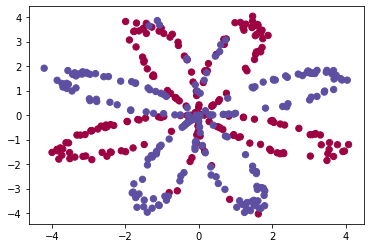

In [51]:
X, Y = load_planar_dataset()


# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [52]:
shape_X = X.shape
shape_Y = Y.shape
m = 400   # training set size

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


In [53]:
# Uncomment in case u want to remove the LR sklearn warning
# Y = Y.reshape((m))
# # print(Y.shape)

clf = sklearn.linear_model.LogisticRegressionCV()   #imported logistic regression function from sklearn
clf.fit(X.T, Y.T)

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


c:\users\jai\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# NN 

In [22]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    
    n_x = X.shape[0]     # size of input layer
    n_h = 4 
    n_y = Y.shape[0]     # size of output layer , since its 0 or 1

    return (n_x, n_h, n_y)

In [23]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2)                                     # the initialization is random.
    

    W1 = np.random.randn(n_h,n_x)*.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*.01
    b2 = np.zeros((n_y,1))

    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters


In [24]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)

    #print(A2.shape)
    #print(X.shape[1])
    assert(A2.shape == (1, X.shape[1]))   # i.e A2.shape==m , confirm this
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [25]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    [Note that the parameters argument is not used in this function, 
    but the auto-grader currently expects this parameter.
    Future version of this notebook will fix both the notebook 
    and the auto-grader so that `parameters` is not needed.
    For now, please include `parameters` in the function signature,
    and also when invoking this function.]
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    logprobs = ( np.multiply( Y , np.log(A2)) + np.multiply( (1-Y) , np.log(1-A2)) )
    cost = -np.sum(logprobs)*(1/m)
    
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [26]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]
        
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]

    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2-Y
    dW2 = np.dot(dZ2,A1.T)*(1.0/m)
    db2 = np.sum(dZ2,axis=1,keepdims=1)*(1/m)
    dZ1 = np.multiply( np.dot(W2.T , dZ2) , 1 - np.power(A1,2) )
    dW1 = np.dot(dZ1,X.T)*(1.0/m)
    db1 = np.sum(dZ1,axis=1,keepdims=1)*(1.0/m)

    #print(dZ1.shape)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [35]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db2"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [36]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x,n_h,n_y)
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X,parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2,Y,parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters,cache,X,Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters,grads)
        
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [37]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X,parameters)
    predictions = A2.round()

    
    return predictions

In [38]:
def sigmoid(x):
    """
    Compute the sigmoid of x
    Arguments:
    x -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

In [55]:
print(X.shape,Y.shape)

(2, 400) (1, 400)


In [54]:
parameters = nn_model(X, Y, n_h = 4, num_iterations = 20000, print_cost=True)


Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.289836
Cost after iteration 2000: 0.273486
Cost after iteration 3000: 0.237145
Cost after iteration 4000: 0.228730
Cost after iteration 5000: 0.224172
Cost after iteration 6000: 0.221169
Cost after iteration 7000: 0.219058
Cost after iteration 8000: 0.217528
Cost after iteration 9000: 0.216403
Cost after iteration 10000: 0.215569
Cost after iteration 11000: 0.214950
Cost after iteration 12000: 0.214492
Cost after iteration 13000: 0.214154
Cost after iteration 14000: 0.213906
Cost after iteration 15000: 0.213725
Cost after iteration 16000: 0.213593
Cost after iteration 17000: 0.213499
Cost after iteration 18000: 0.213431
Cost after iteration 19000: 0.213382


In [42]:
import numpy as np
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log
import copy 

df = pd.read_csv('C:\\Users\\Jai\\Desktop\\adult.csv',na_values='?')

num_cols = list(df.select_dtypes(include=["number"]).columns)
cat_cols = list(df.select_dtypes(exclude=["number"]).columns)

print((num_cols))
print()
print(cat_cols)

original_len = len(df)


print(original_len)

df = df.dropna() 

print(len(df))   

df.head(2)          


['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
48842
45222


age workclass  fnlwgt education  educational-num      marital-status  \
0   25   Private  226802      11th                7       Never-married   
1   38   Private   89814   HS-grad                9  Married-civ-spouse   

          occupation relationship   race gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black   Male             0             0   
1    Farming-fishing      Husband  White   Male             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K

In [44]:
trainx = df[num_cols]

y = df[['income']]

trainx.head()


age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week
0   25  226802                7             0             0              40
1   38   89814                9             0             0              50
2   28  336951               12             0             0              40
3   44  160323               10          7688             0              40
5   34  198693                6             0             0              30

In [45]:
print(y['income'].value_counts())
print(len(y))
y.head()


<=50K    34014
>50K     11208
Name: income, dtype: int64
45222


income
0  <=50K
1  <=50K
2   >50K
3   >50K
5  <=50K

In [46]:
ytrain = np.zeros((len(y),1))
for i in range(0,len(y)):
    if y['income'].iloc[i]=='>50K':
        ytrain[i]=1
    
temp = pd.DataFrame(ytrain)
# temp.head()
temp[0].value_counts()

0.0    34014
1.0    11208
Name: 0, dtype: int64

In [71]:
X_train = np.array(trainx)
y_train = np.array(ytrain)

print("Total  : ",X_train.shape,y_train.shape)

xtrain = X_train[0:1000]
ytrain = y_train[0:1000]

print("Chosen : ",xtrain.shape,ytrain.shape)

Total  :  (45222, 6) (1000, 1)
Chosen :  (1000, 6) (1000, 1)


In [72]:
xtrain = xtrain.reshape(xtrain.shape[1],xtrain.shape[0])
ytrain = ytrain.reshape(ytrain.shape[1],ytrain.shape[0])

print(xtrain.shape)
print(ytrain.shape)

(6, 1000)
(1, 1000)


In [84]:
parameters = nn_model(xtrain, ytrain, n_h = 10, num_iterations = 60000, print_cost=True)


Cost after iteration 0: 0.696333
Cost after iteration 1000: 0.561686
Cost after iteration 2000: 0.561418
Cost after iteration 3000: 0.558403
Cost after iteration 4000: 0.558356
Cost after iteration 5000: 0.561043
Cost after iteration 6000: 0.561041
Cost after iteration 7000: 0.560866
Cost after iteration 8000: 0.561596
Cost after iteration 9000: 0.561595
Cost after iteration 10000: 0.561595
Cost after iteration 11000: 0.560414
Cost after iteration 12000: 0.560414
Cost after iteration 13000: 0.560413
Cost after iteration 14000: 0.561275
Cost after iteration 15000: 0.561225
Cost after iteration 16000: 0.561193
Cost after iteration 17000: 0.560978
Cost after iteration 18000: 0.560961
Cost after iteration 19000: 0.560949
Cost after iteration 20000: 0.560941
Cost after iteration 21000: 0.560934
Cost after iteration 22000: 0.560928
Cost after iteration 23000: 0.560923
Cost after iteration 24000: 0.560919
Cost after iteration 25000: 0.560915
Cost after iteration 26000: 0.557935
Cost after ite

In [85]:
def accuracy(y_ac,y_pr):
    cnt = 0
    for i in range(len(y_pr)):
        if y_pr[i]!=y_ac[i]:
            cnt+=1
            
    return cnt/len(y_pr)


In [87]:
preds = predict(parameters,xtrain)

In [88]:
print(preds.shape)
print(ytrain.shape)

(1, 1000)
(1, 1000)


In [90]:
# print(preds)